In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import tidetools, geo_tools, viz_tools
import pickle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

In [13]:
plt.style.use('/ocean/vdo/MEOPAR/biomodelevalpaper/bioModelEvalPaper.mplstyle')

In [8]:
dfo_chl = pickle.load(open('dfo_chl.pkl', 'rb'))
model_chl_dfo = pickle.load(open('model_chl_dfo.pkl', 'rb'))
cs_chl_2015 = pickle.load(open('cs_chl_2015.pkl', 'rb'))
cs_chl_2016 = pickle.load(open('cs_chl_2016.pkl', 'rb'))
cs_chl_2017 = pickle.load(open('cs_chl_2017.pkl', 'rb'))
model_chl_cs_2015 = pickle.load(open('model_chl_2015cs.pkl', 'rb'))
model_chl_cs_2016 = pickle.load(open('model_chl_2016cs.pkl', 'rb'))
model_chl_cs_2017 = pickle.load(open('model_chl_2017.pkl', 'rb'))

In [9]:
cs_chl = np.append(np.append(cs_chl_2015, cs_chl_2016), cs_chl_2017)
model_chl_cs = np.append(np.append(model_chl_cs_2015, model_chl_cs_2016), model_chl_cs_2017)

In [32]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.titlesize'] = 18

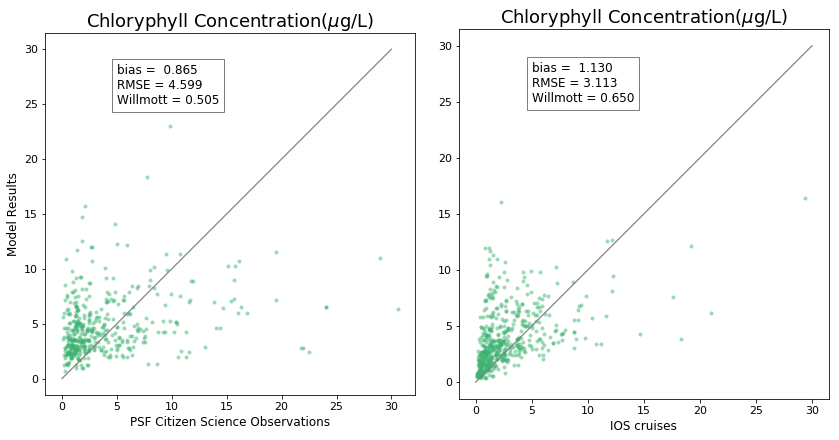

In [69]:
fig, ax = plt.subplots(1, 2, figsize = (12, 12))
ax[0].plot(cs_chl, model_chl_cs, '.', color = 'MediumSeaGreen', alpha = 0.5)
ax[0].set_title('Chloryphyll Concentration($\mu$g/L)')
ax[0].text(5, 25, 'bias =  0.865 \nRMSE = 4.599 \nWillmott = 0.505',
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':5}, fontsize = 12)
ax[1].text(5, 25, 'bias =  1.130 \nRMSE = 3.113 \nWillmott = 0.650',
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':5}, fontsize = 12)
ax[1].plot(dfo_chl, model_chl_dfo, '.', alpha = 0.5, color = 'MediumSeaGreen')
ax[1].set_title('Chloryphyll Concentration($\mu$g/L)')
ax[0].set_xlabel('PSF Citizen Science Observations')
ax[0].set_ylabel('Model Results')
ax[1].set_xlabel('IOS cruises')
#ax[1].set_ylabel('Model Results')
ax[0].set_aspect('equal')
#ax[0,0].set_xlim(5, 33)
#ax[0,0].set_ylim(5, 32)
ax[1].set_aspect('equal')
#ax[0,1].set_xlim(6, 22)
#ax[0,1].set_ylim(6, 22)
ax[0].plot(np.arange(31), np.arange(31), color = 'grey')
ax[1].plot(np.arange(0,31), np.arange(0,31), color = 'grey')
fig.tight_layout()
#fig.savefig('/home/vdo/Pictures/psf_plots.png', dpi = 400)

In [22]:
print('bias =  ' + str(-np.mean(dfo_chl) + np.mean(model_chl_dfo)))
print('RMSE = ' + str(np.sqrt(np.sum((model_chl_dfo - dfo_chl)**2) /
                              len(dfo_chl))))
xbar = np.mean(dfo_chl)
print('Willmott = ' + str(1-(np.sum((model_chl_dfo - dfo_chl)**2)  / 
                             np.sum((np.abs(model_chl_dfo - xbar) 
                                     + np.abs(dfo_chl - xbar))**2))))

bias =  1.1295675984707625
RMSE = 3.1130318776174235
Willmott = 0.6498509292361905


In [29]:
print('bias =  ' + str(-np.mean(cs_chl) + np.mean(model_chl_cs)))
print('RMSE = ' + str(np.sqrt(np.sum((model_chl_cs - cs_chl)**2) /
                              len(cs_chl))))
xbar = np.mean(cs_chl)
print('Willmott = ' + str(1-(np.sum((model_chl_cs - cs_chl)**2)  / 
                             np.sum((np.abs(model_chl_cs - xbar) 
                                     + np.abs(cs_chl - xbar))**2))))

bias =  0.864778575809408
RMSE = 4.599369232848489
Willmott = 0.5048541500786355


In [36]:
dfo_si = pickle.load(open('dfo_si.pkl', 'rb'))
model_si_dfo = pickle.load(open('model_si_dfo.pkl', 'rb'))
dfo_ni = pickle.load(open('dfo_ni.pkl', 'rb'))
model_ni_dfo = pickle.load(open('model_ni_dfo.pkl', 'rb'))
cs_si_2015 = pickle.load(open('../smelt_diag/cs_si_2015.pkl', 'rb'))
cs_si_2016 = pickle.load(open('cs_si_2016.pkl', 'rb'))
cs_si_2017 = pickle.load(open('cs_si_2017.pkl', 'rb'))
cs_ni_2015 = pickle.load(open('../smelt_diag/cs_ni_2015.pkl', 'rb'))
cs_ni_2016 = pickle.load(open('cs_ni_2016.pkl', 'rb'))
cs_ni_2017 = pickle.load(open('cs_ni_2017.pkl', 'rb'))
model_si_cs_2015 = pickle.load(open('../smelt_diag/model_si_2015.pkl', 'rb'))
model_si_cs_2016 = pickle.load(open('model_si_2016.pkl', 'rb'))
model_si_cs_2017 = pickle.load(open('model_si_2017.pkl', 'rb'))
model_ni_cs_2015 = pickle.load(open('../smelt_diag/model_ni_2015.pkl', 'rb'))
model_ni_cs_2016 = pickle.load(open('model_ni_2016.pkl', 'rb'))
model_ni_cs_2017 = pickle.load(open('model_ni_2017.pkl', 'rb'))

In [37]:
cs_ni = np.append(np.append(cs_ni_2015, cs_ni_2016), cs_ni_2017)
model_ni_cs = np.append(np.append(model_ni_cs_2015, model_ni_cs_2016), model_ni_cs_2017)
cs_si = np.append(np.append(cs_si_2015, cs_si_2016), cs_si_2017)
model_si_cs = np.append(np.append(model_si_cs_2015, model_si_cs_2016), model_si_cs_2017)

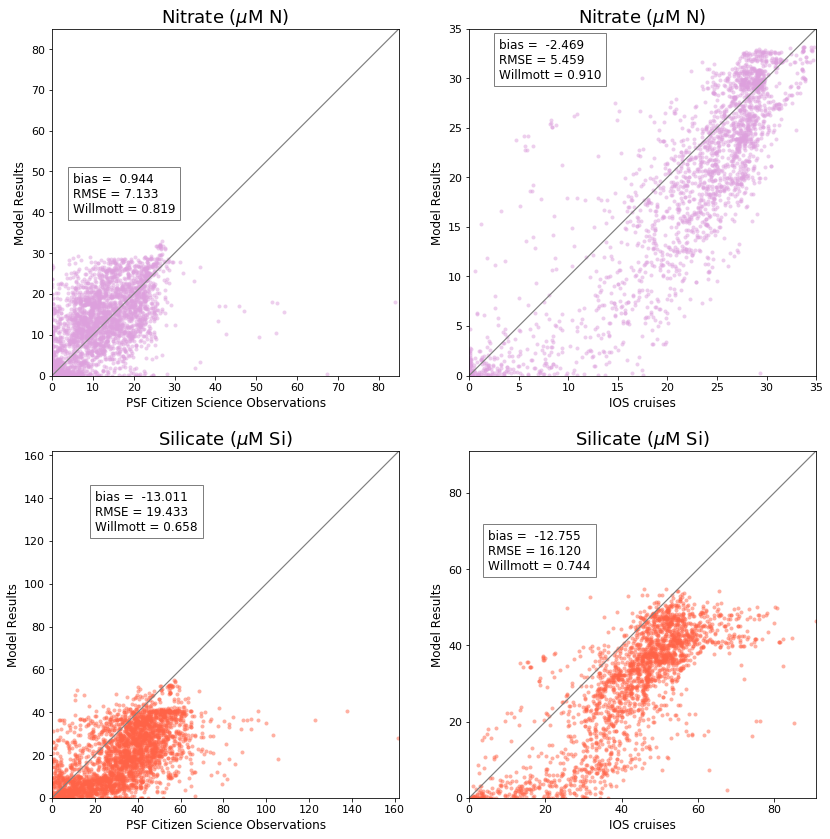

In [73]:
fig, ax = plt.subplots(2, 2, figsize = (12, 12))
ax[0,0].plot(cs_ni, model_ni_cs, '.', alpha = 0.5, color = 'Plum')
ax[0,0].set_title('Nitrate ($\mu$M N)')
ax[0,0].text(5, 40, 'bias =  0.944 \nRMSE = 7.133 \nWillmott = 0.819',
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':5}, fontsize = 12)
ax[0,1].text(3, 30, 'bias =  -2.469 \nRMSE = 5.459 \nWillmott = 0.910',
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':5}, fontsize = 12)
ax[1,0].text(20, 125, 'bias =  -13.011 \nRMSE = 19.433 \nWillmott = 0.658',
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':5}, fontsize = 12)
ax[1,1].text(5, 60, 'bias =  -12.755 \nRMSE = 16.120 \nWillmott = 0.744',
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':5}, fontsize = 12)
ax[0,1].plot(dfo_ni, model_ni_dfo, '.', alpha = 0.5, color = 'Plum')
ax[0,1].set_title('Nitrate ($\mu$M N)')
ax[0,0].set_xlabel('PSF Citizen Science Observations')
ax[0,0].set_ylabel('Model Results')
ax[0,1].set_xlabel('IOS cruises')
ax[0,1].set_ylabel('Model Results')
ax[1,0].plot(cs_si, model_si_cs, '.', color = 'Tomato', alpha = 0.5)
ax[1,1].plot(dfo_si, model_si_dfo, '.', color = 'Tomato', alpha = 0.5)
ax[1,0].set_xlabel('PSF Citizen Science Observations')
ax[1,0].set_ylabel('Model Results')
ax[1,1].set_xlabel('IOS cruises')
ax[1,1].set_ylabel('Model Results')
ax[1,0].set_title('Silicate ($\mu$M Si)')
ax[1,1].set_title('Silicate ($\mu$M Si)')
ax[0,0].set_aspect('equal')
ax[0,0].set_xlim(0,85)
ax[0,0].set_ylim(0,85)
ax[0,1].set_aspect('equal')
ax[0,1].set_xlim(0, 35)
ax[0,1].set_ylim(0, 35)
ax[1,1].set_aspect('equal')
ax[1,0].set_aspect('equal')
ax[1,0].set_xlim(0, 162)
ax[1,0].set_ylim(0, 162)
ax[1,1].set_xlim(0, 91)
ax[1,1].set_ylim(0, 91)
ax[0,0].plot(np.arange(200), np.arange(200), color = 'grey')
ax[1,0].plot(np.arange(200), np.arange(200), color = 'grey')
ax[1,1].plot(np.arange(200), np.arange(200), color='grey')
ax[0,1].plot(np.arange(200), np.arange(200), color='grey')
fig.tight_layout()
#fig.savefig('/home/vdo/Pictures/psf_plots.png', dpi = 400)

In [65]:
print('bias =  ' + str(-np.mean(dfo_ni) + np.mean(model_ni_dfo)))
print('RMSE = ' + str(np.sqrt(np.sum((model_ni_dfo - dfo_ni)**2) /
                              len(dfo_ni))))
xbar = np.mean(dfo_ni)
print('Willmott = ' + str(1-(np.sum((model_ni_dfo - dfo_ni)**2)  / 
                             np.sum((np.abs(model_ni_dfo - xbar) 
                                     + np.abs(dfo_ni - xbar))**2))))

bias =  -2.468680941745948
RMSE = 5.458861373711734
Willmott = 0.9095851279525309


In [66]:
print('bias =  ' + str(-np.mean(dfo_si) + np.mean(model_si_dfo)))
print('RMSE = ' + str(np.sqrt(np.sum((model_si_dfo - dfo_si)**2) /
                              len(dfo_si))))
xbar = np.mean(dfo_si)
print('Willmott = ' + str(1-(np.sum((model_si_dfo - dfo_si)**2)  / 
                             np.sum((np.abs(model_si_dfo - xbar) 
                                     + np.abs(dfo_si - xbar))**2))))

bias =  -12.755058534790251
RMSE = 16.14025142648156
Willmott = 0.7442911847190237


In [67]:
print('bias =  ' + str(-np.mean(cs_ni) + np.mean(model_ni_cs)))
print('RMSE = ' + str(np.sqrt(np.sum((model_ni_cs - cs_ni)**2) /
                              len(cs_ni))))
xbar = np.mean(cs_ni)
print('Willmott = ' + str(1-(np.sum((model_ni_cs - cs_ni)**2)  / 
                             np.sum((np.abs(model_ni_cs - xbar) 
                                     + np.abs(cs_ni - xbar))**2))))

bias =  0.9442933364121817
RMSE = 7.133035383065919
Willmott = 0.8185071495780174


In [68]:
print('bias =  ' + str(-np.mean(cs_si) + np.mean(model_si_cs)))
print('RMSE = ' + str(np.sqrt(np.sum((model_si_cs - cs_si)**2) /
                              len(cs_si))))
xbar = np.mean(cs_si)
print('Willmott = ' + str(1-(np.sum((model_si_cs - cs_si)**2)  / 
                             np.sum((np.abs(model_si_cs - xbar) 
                                     + np.abs(cs_si - xbar))**2))))

bias =  -13.010929475600005
RMSE = 19.43283538811566
Willmott = 0.6581344687762231
